In [1]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
mypal = plt.rcParams['axes.prop_cycle'].by_key()['color'] # Grab the color pal
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [2]:
match_results = pd.read_csv('data/match_results.csv')
team_stats = pd.read_csv('data/team_stats_full.csv')
team_stats_home = pd.read_csv('data/team_stats_home.csv')
team_stats_away = pd.read_csv('data/team_stats_away.csv')
team_values = pd.read_csv('data/team_values.csv')
team_stats_2000 = pd.read_csv('data/team_stats_2000.csv')

### Exploratory Data Analysis and Cleaning

#### Match Results

In [3]:
match_results

,Wk,Day,Date,Time,Referee,Attendance,Home,Away,Home_Score,Away_Score,Outcome,Season
0,1.0,Sat,2000-08-19,NaN,Alan Wiley,NaN,Tottenham,Ipswich Town,3,1,1,2001
1,1.0,Sat,2000-08-19,NaN,Andy D'Urso,NaN,Derby County,Southampton,2,2,0,2001
2,1.0,Sat,2000-08-19,NaN,Mike Riley,NaN,Leicester City,Aston Villa,0,0,0,2001
3,1.0,Sat,2000-08-19,NaN,Graham Barber,NaN,Chelsea,West Ham,4,2,1,2001
4,1.0,Sat,2000-08-19,NaN,Barry Knight,NaN,Coventry City,Middlesbrough,1,3,-1,2001
...,...,...,...,...,...,...,...,...,...,...,...,...
7975,38.0,Sun,2021-05-23,16:00,Martin Atkinson,10000.0,West Ham,Southampton,3,0,1,2021
7976,38.0,Sun,2021-05-23,16:00,Chris Kavanagh,2000.0,Fulham,Newcastle Utd,0,2,-1,2021
7977,38.0,Sun,2021-05-23,16:00,Jonathan Moss,10000.0,Arsenal,Brighton,2,0,1,2021
7978,38.0,Sun,2021-05-23,16:00,Kevin Friend,5000.0,Sheffield Utd,Burnley,1,0,1,2021


In [4]:
#Inspect data
match_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7980 entries, 0 to 7979
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Wk          7980 non-null   float64
 1   Day         7980 non-null   object 
 2   Date        7980 non-null   object 
 3   Time        2660 non-null   object 
 4   Referee     7980 non-null   object 
 5   Attendance  2220 non-null   float64
 6   Home        7980 non-null   object 
 7   Away        7980 non-null   object 
 8   Home_Score  7980 non-null   int64  
 9   Away_Score  7980 non-null   int64  
 10  Outcome     7980 non-null   int64  
 11  Season      7980 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 748.2+ KB


In [5]:
#Convert dtype of Date column to DateTime object
match_results['Date'] = pd.to_datetime(match_results['Date'])

In [6]:
#Missing values
match_results.isnull().sum()

Wk               0
Day              0
Date             0
Time          5320
Referee          0
Attendance    5760
Home             0
Away             0
Home_Score       0
Away_Score       0
Outcome          0
Season           0
dtype: int64

- We found that almost missing values of Time and Attendance were from season 2001 to 2014, these seasons happened a long time ago so it's likely that their data hasn't been collected, we will look at them later

In [7]:
match_results[(match_results['Time'].isnull()) & (match_results['Attendance'].isnull())]

,Wk,Day,Date,Time,Referee,Attendance,Home,Away,Home_Score,Away_Score,Outcome,Season
0,1.0,Sat,2000-08-19,NaN,Alan Wiley,NaN,Tottenham,Ipswich Town,3,1,1,2001
1,1.0,Sat,2000-08-19,NaN,Andy D'Urso,NaN,Derby County,Southampton,2,2,0,2001
2,1.0,Sat,2000-08-19,NaN,Mike Riley,NaN,Leicester City,Aston Villa,0,0,0,2001
3,1.0,Sat,2000-08-19,NaN,Graham Barber,NaN,Chelsea,West Ham,4,2,1,2001
4,1.0,Sat,2000-08-19,NaN,Barry Knight,NaN,Coventry City,Middlesbrough,1,3,-1,2001
...,...,...,...,...,...,...,...,...,...,...,...,...
5315,38.0,Sun,2014-05-11,NaN,Chris Foy,NaN,Sunderland,Swansea City,1,3,-1,2014
5316,38.0,Sun,2014-05-11,NaN,Michael Oliver,NaN,Cardiff City,Chelsea,1,2,-1,2014
5317,38.0,Sun,2014-05-11,NaN,Phil Dowd,NaN,Liverpool,Newcastle Utd,2,1,1,2014
5318,38.0,Sun,2014-05-11,NaN,Howard Webb,NaN,Hull City,Everton,0,2,-1,2014


- With the rest of the missing values of Attendance, their were from season 2020 to 2021, and the reason for the missing values is because of the affect of Covid19, so we will fill it with zero

In [8]:
match_results.loc[(match_results['Time'].notnull()) & (match_results['Attendance'].isnull()),'Attendance'] = 0

- After analysis, we found that there is no clear relationship between the missing values with the target (Outcome match)

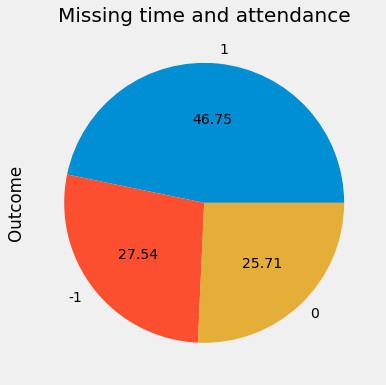

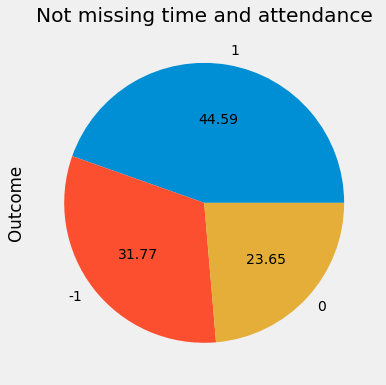

In [9]:
match_results[(match_results['Time'].isnull()) & (match_results['Attendance'].isnull())]['Outcome'].value_counts().plot(kind='pie',figsize=(10,6),autopct='%.2f')
plt.title('Missing time and attendance')
plt.show()

match_results[(match_results['Time'].notnull())]['Outcome'].value_counts().plot(kind='pie',figsize=(10,6),autopct='%.2f')
plt.title('Not missing time and attendance')
plt.show()

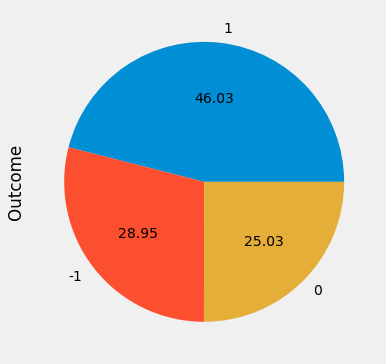

In [10]:
#Outcome match
match_results['Outcome'].value_counts().plot(kind='pie',figsize=(15,6),autopct='%.2f')
plt.show()

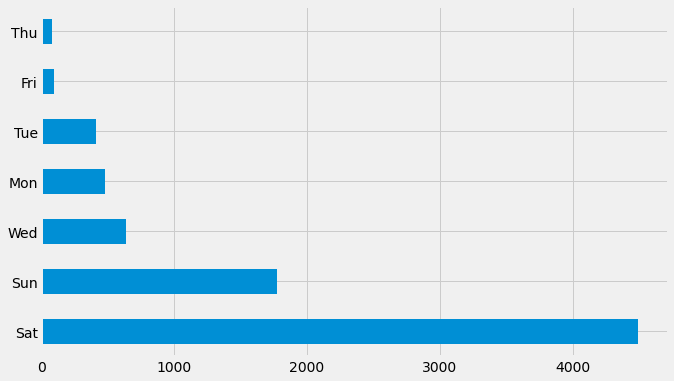

In [11]:
#Weekday
match_results['Day'].value_counts().plot(kind='barh',figsize=(10,6))
plt.show()

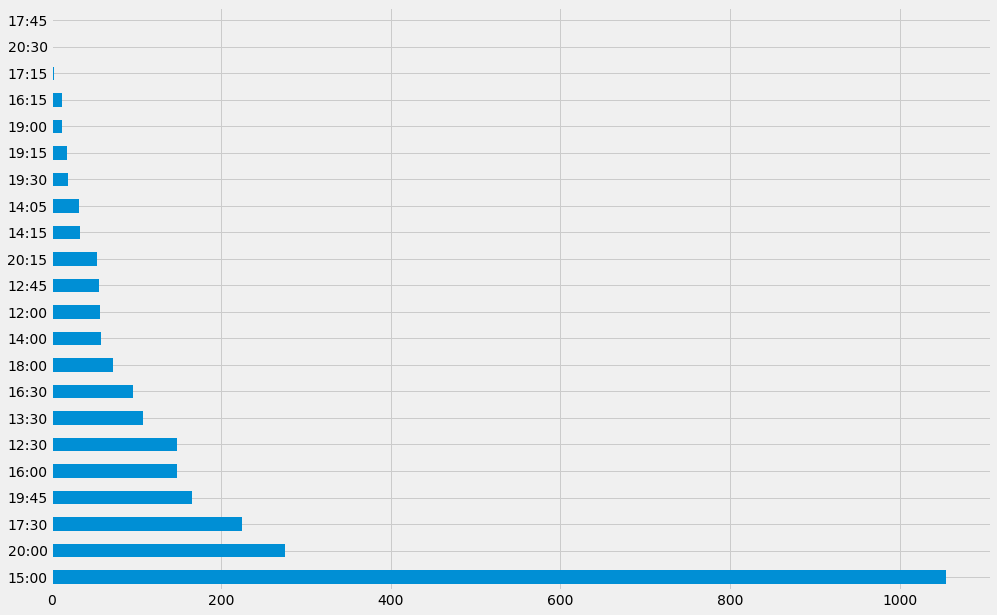

In [12]:
#The time happening match
match_results['Time'].value_counts().plot(kind='barh',figsize=(15,10))
plt.show()

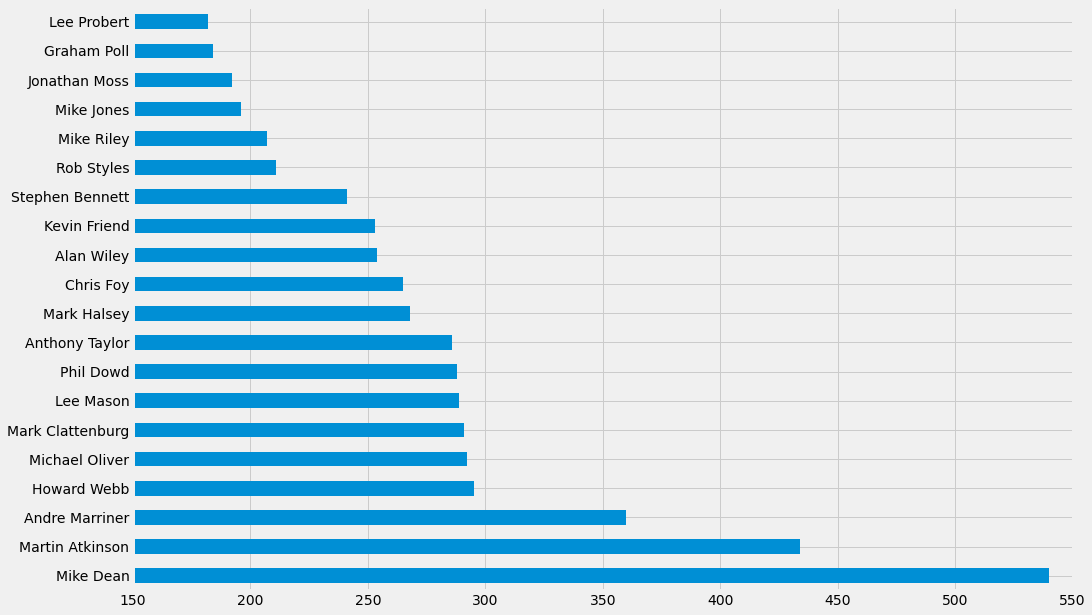

In [13]:
#Top 20 referees attending most match
match_results['Referee'].value_counts().head(20).plot(kind='barh',figsize=(15,10),xlim=(150,550))
plt.show()

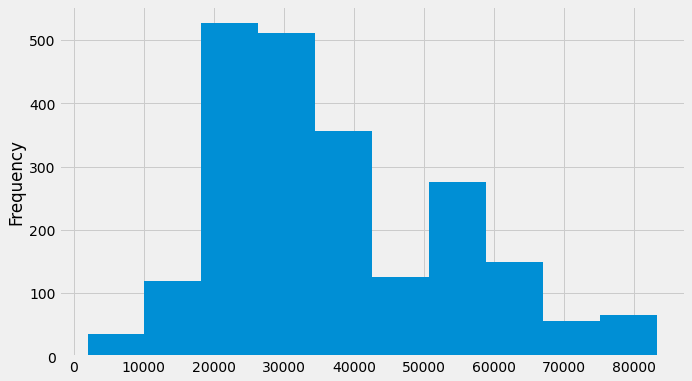

In [14]:
#Attendance
temp = match_results[match_results['Attendance'] > 0]
temp['Attendance'].plot(kind='hist',figsize=(10,6))
plt.show()

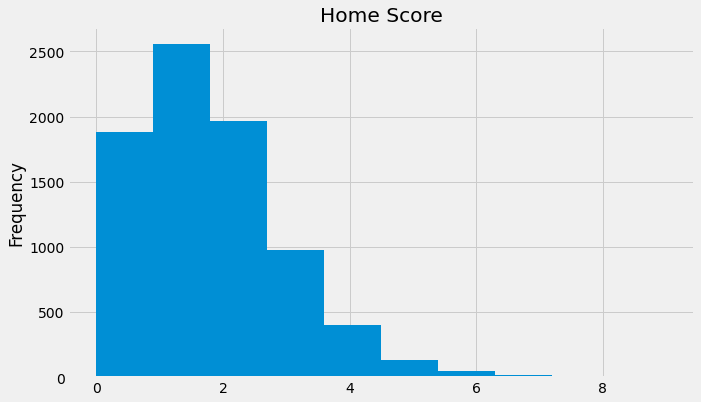

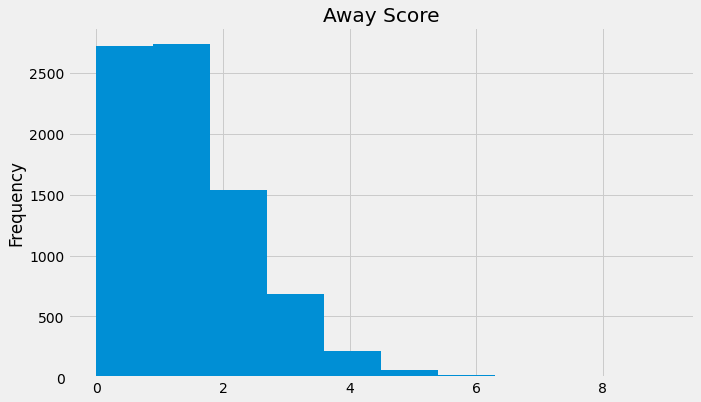

In [15]:
#Score
match_results['Home_Score'].plot(kind='hist',figsize=(10,6))
plt.title('Home Score')
plt.show()

match_results['Away_Score'].plot(kind='hist',figsize=(10,6))
plt.title('Away Score')
plt.show()

- We found that two columns Home_Score and Away_Score are stats that recorded after the match, so we will drop them

In [16]:
match_results.drop(['Home_Score','Away_Score'],axis=1,inplace=True)

#### Team Stats

In [17]:
team_stats

,Team,W,D,L,Diff,Goal,Opponent Goal,Rank,wk,Season
0,Charlton Ath,1,0,0,4,4,0,1,1,2001
1,Chelsea,1,0,0,2,4,2,2,1,2001
2,Middlesbrough,1,0,0,2,3,1,3,1,2001
3,Tottenham,1,0,0,2,3,1,4,1,2001
4,Leeds United,1,0,0,2,2,0,5,1,2001
...,...,...,...,...,...,...,...,...,...,...
15955,Brighton,9,14,15,-6,40,46,16,38,2021
15956,Burnley,10,9,19,-22,33,55,17,38,2021
15957,Fulham,5,13,20,-26,27,53,18,38,2021
15958,West Brom,5,11,22,-41,35,76,19,38,2021


In [18]:
#Inspect data
team_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15960 entries, 0 to 15959
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Team           15960 non-null  object
 1   W              15960 non-null  int64 
 2   D              15960 non-null  int64 
 3   L              15960 non-null  int64 
 4   Diff           15960 non-null  int64 
 5   Goal           15960 non-null  int64 
 6   Opponent Goal  15960 non-null  int64 
 7   Rank           15960 non-null  int64 
 8   wk             15960 non-null  int64 
 9   Season         15960 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 1.2+ MB


In [19]:
#Missing values
team_stats.isnull().sum()

Team             0
W                0
D                0
L                0
Diff             0
Goal             0
Opponent Goal    0
Rank             0
wk               0
Season           0
dtype: int64

In [20]:
#Top teams have the most win game in a season
team_stats[team_stats['wk']==38][['Team','W','Diff','Rank','Season']].sort_values('W',ascending=False).head(20)

,Team,W,Diff,Rank,Season
13660,Manchester City,32,79,1,2018
14420,Manchester City,32,72,1,2019
15180,Liverpool,32,52,1,2020
14421,Liverpool,30,67,2,2019
12900,Chelsea,30,52,1,2017
4540,Chelsea,29,50,1,2006
3780,Chelsea,29,57,1,2005
9860,Manchester Utd,28,43,1,2013
9101,Manchester Utd,28,56,2,2012
9100,Manchester City,28,64,1,2012


In [21]:
#Top teams have the most draw game in a season
team_stats[team_stats['wk']==38][['Team','D','Diff','Rank','Season']].sort_values('D',ascending=False).head(20)

,Team,D,Diff,Rank,Season
9115,Aston Villa,17,-16,16,2012
11395,Sunderland,17,-22,16,2015
3024,Newcastle Utd,17,12,5,2004
5310,Aston Villa,17,2,11,2007
8347,Fulham,16,6,8,2011
3796,West Brom,16,-25,17,2005
8355,Wigan Athletic,15,-21,16,2011
12905,Manchester Utd,15,25,6,2017
8357,Birmingham City,15,-21,18,2011
8346,Everton,15,6,7,2011


In [22]:
#Top teams have the most lose game in a season
team_stats[team_stats['wk']==38][['Team','L','Diff','Rank','Season']].sort_values('L',ascending=False).head(20)

,Team,L,Diff,Rank,Season
15959,Sheffield Utd,29,-43,20,2021
4559,Sunderland,29,-43,20,2006
6079,Derby County,29,-69,20,2008
14439,Huddersfield,28,-54,20,2019
15199,Norwich City,27,-49,20,2020
2279,Sunderland,27,-44,20,2003
12159,Aston Villa,27,-49,20,2016
14438,Fulham,26,-47,19,2019
12919,Sunderland,26,-40,20,2017
7599,Portsmouth,24,-32,20,2010


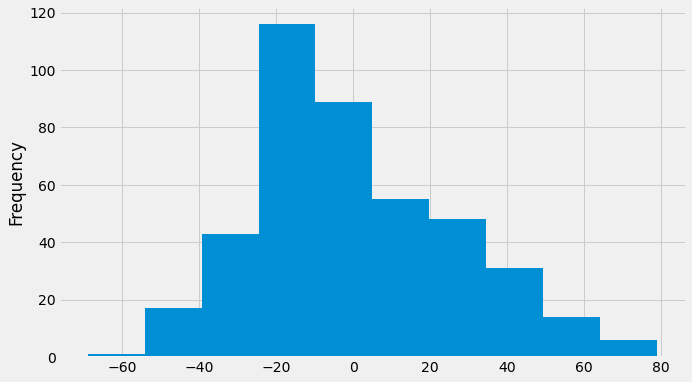

In [23]:
#Goal difference distribution
team_stats[team_stats['wk']==38]['Diff'].plot(kind='hist',figsize=(10,6))
plt.show()

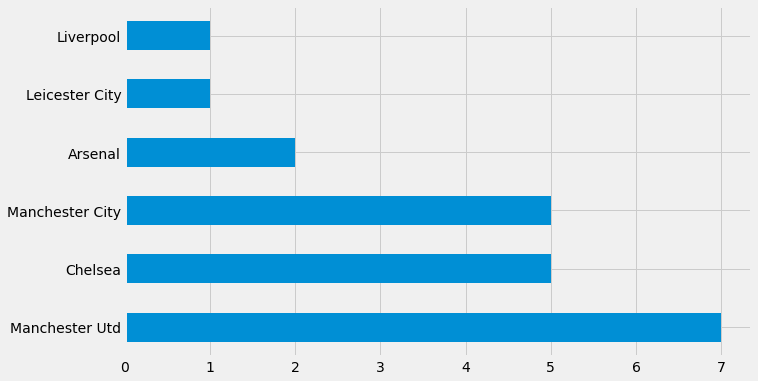

In [24]:
#Top teams have the most championship wins
team_stats[(team_stats['wk']==38) & (team_stats['Rank']==1)]['Team'].value_counts().plot(kind='barh',figsize=(10,6))
plt.show()

In [25]:
team_stats_home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15960 entries, 0 to 15959
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Team           15960 non-null  object
 1   W              15960 non-null  int64 
 2   D              15960 non-null  int64 
 3   L              15960 non-null  int64 
 4   Diff           15960 non-null  int64 
 5   Goal           15960 non-null  int64 
 6   Opponent Goal  15960 non-null  int64 
 7   Rank           15960 non-null  int64 
 8   wk             15960 non-null  int64 
 9   Season         15960 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 1.2+ MB


In [26]:
#Create new columns
team_stats['Avg Goal'] = team_stats['Goal'] / team_stats['wk']
team_stats['Avg Opponent Goal'] = team_stats['Opponent Goal'] / team_stats['wk']

team_stats_home['Avg Goal'] = team_stats_home['Goal'] / (team_stats_home['W'] + team_stats_home['D'] + team_stats_home['L'])
team_stats_home['Avg Opponent Goal'] = team_stats_home['Opponent Goal'] / (team_stats_home['W'] + team_stats_home['D'] + team_stats_home['L'])
team_stats_home.fillna(0,inplace=True)

team_stats_away['Avg Goal'] = team_stats_away['Goal'] / (team_stats_home['W'] + team_stats_home['D'] + team_stats_home['L'])
team_stats_away['Avg Opponent Goal'] = team_stats_away['Opponent Goal'] / (team_stats_home['W'] + team_stats_home['D'] + team_stats_home['L'])
team_stats_away.fillna(0,inplace=True)

#### Team Values

In [27]:
team_values

,Team,Values,When,Season
0,Arsenal FC,-,summer,2001
1,Aston Villa,-,summer,2001
2,Derby County,-,summer,2001
3,Chelsea FC,-,summer,2001
4,Everton FC,-,summer,2001
...,...,...,...,...
835,Brighton & Hove Albion,€248.85m,winter,2021
836,Brentford FC,€82.35m,winter,2021
837,Norwich City,€118.75m,winter,2021
838,Burnley FC,€151.65m,winter,2021


In [28]:
#Inspect data
team_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Team    840 non-null    object
 1   Values  840 non-null    object
 2   When    840 non-null    object
 3   Season  840 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 26.4+ KB


In [29]:
#Correct numeric values of Values column
team_values['Values'] = team_values['Values'].str.replace('€','')
team_values.loc[team_values['Values'].str.contains('m'),'Values']\
    = team_values.loc[team_values['Values'].str.contains('m'),'Values'].str.replace('m','')
team_values.loc[team_values['Values'].str.contains('bn'),'Values']\
    = team_values.loc[team_values['Values'].str.contains('bn'),'Values'].apply(lambda x: float(x.split('b')[0])*1000)
team_values.loc[team_values['Values']=='-','Values'] = np.nan
team_values['Values'] = team_values['Values'].astype('float')

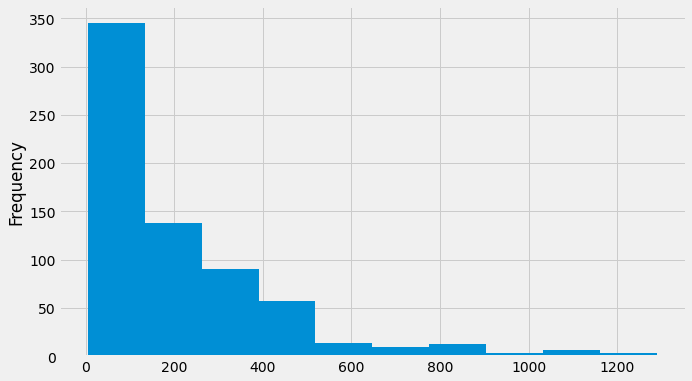

In [30]:
#Team values distribution
team_values['Values'].plot(kind='hist',figsize=(10,6))
plt.show()

In [31]:
#Top teams have most improvement in team values from summer to winter
def diff_values(row,df_values=team_values):
    """
    Return the difference value of teams between summer and winter
    """
    team = row['Team']
    ss = row['Season']
    summer_values = df_values.loc[(df_values['Team']==team) & (df_values['Season']==ss) & (df_values['When']=='summer'),'Values'].values[0]
    winter_values = df_values.loc[(df_values['Team']==team) & (df_values['Season']==ss) & (df_values['When']=='winter'),'Values'].values[0]
    
    return winter_values - summer_values

temp = team_values[['Team','Season']].drop_duplicates()
temp['Difference Values'] = temp.apply(diff_values,axis=1)

temp.sort_values('Difference Values',ascending=False).head(20)

,Team,Season,Difference Values
680,Manchester City,2018,163.00
684,Tottenham Hotspur,2018,155.00
683,Manchester United,2018,148.75
761,Liverpool FC,2020,120.00
765,Leicester City,2020,91.00
768,Aston Villa,2020,70.40
682,Chelsea FC,2018,63.85
644,Tottenham Hotspur,2017,55.50
402,Chelsea FC,2011,48.50
763,Manchester United,2020,47.50


### Features Combining and Engineering

In [32]:
def results_team_stats(match_results,team_stats,team_stats_home,team_stats_away,team_stats_2000):
    """
    Return the the dataframe combined by match results and team stats
    
    Parameters:
    match_results: dataframe
    team_stats: dataframe
    team_stats_home: dataframe
    team_stats_away: dataframe
    team_stats_2000: dataframe
    """

    match_data = match_results.copy()
    team_data = team_stats.copy()
    home_team_data = team_stats_home.copy()
    away_team_data = team_stats_away.copy()
    ss_2000 = team_stats_2000.copy()

    #Add new empty columns
    for col in [
        'Home Win','Home Drawn','Home Lose','Home Avg Goal','Home Avg Opp Goal','Home Diff','Home Rank','Last Season Home',
        'Away Win','Away Drawn','Away Lose','Away Avg Goal','Away Avg Opp Goal','Away Diff','Away Rank','Last Season Away'
    ]:
        match_data[col] = 0

    count = 0
    for row in range(len(match_data)):
        #filter data
        home = match_data.loc[row,'Home']
        away = match_data.loc[row,'Away']
        season = match_data.loc[row,'Season']
        week = match_data.loc[row,'Wk']
        #extract data
        home_condition = (match_data['Wk'] == week) & (match_data['Season'] == season) & (match_data['Home'] == home) & (match_data['Wk'] != 1)
        away_condition = (match_data['Wk'] == week) & (match_data['Season'] == season) & (match_data['Away'] == away) & (match_data['Wk'] != 1)
        
        get_home = (home_team_data['wk'] == week-1) & (home_team_data['Season'] == season) & (home_team_data['Team'] == home)
        get_away = (away_team_data['wk'] == week-1) & (away_team_data['Season'] == season) & (away_team_data['Team'] == away)

        get_home_rank = (team_data['wk'] == week-1) & (team_data['Season'] == season) & (team_data['Team'] == home)
        get_away_rank = (team_data['wk'] == week-1) & (team_data['Season'] == season) & (team_data['Team'] == away)

        #extract last season rank
        last_home = (match_data['Season'] == season) & (match_data['Home'] == home)
        last_away = (match_data['Season'] == season) & (match_data['Away'] == away)

        get_last_home = (team_data['wk'] == 38) & (team_data['Season'] == season-1) & (team_data['Team'] == home)
        get_last_away = (team_data['wk'] == 38) & (team_data['Season'] == season-1) & (team_data['Team'] == away)

        #fill data 
        try:
            match_data.loc[home_condition,'Home Win'] = home_team_data[get_home]['W'].values[0]
            match_data.loc[home_condition,'Home Drawn'] = home_team_data[get_home]['D'].values[0]
            match_data.loc[home_condition,'Home Lose'] = home_team_data[get_home]['L'].values[0]
            match_data.loc[home_condition,'Home Avg Goal'] = home_team_data[get_home]['Avg Goal'].values[0]
            match_data.loc[home_condition,'Home Avg Opp Goal'] = home_team_data[get_home]['Avg Opponent Goal'].values[0]
            match_data.loc[home_condition,'Home Diff'] = home_team_data[get_home]['Diff'].values[0]
            match_data.loc[home_condition,'Home Rank'] = team_data[get_home_rank]['Rank'].values[0]

            match_data.loc[away_condition,'Away Win'] = away_team_data[get_away]['W'].values[0]
            match_data.loc[away_condition,'Away Drawn'] = away_team_data[get_away]['D'].values[0]
            match_data.loc[away_condition,'Away Lose'] = away_team_data[get_away]['L'].values[0]
            match_data.loc[away_condition,'Away Avg Goal'] = away_team_data[get_away]['Avg Goal'].values[0]
            match_data.loc[away_condition,'Away Avg Opp Goal'] = away_team_data[get_away]['Avg Opponent Goal'].values[0]
            match_data.loc[away_condition,'Away Diff'] = away_team_data[get_away]['Diff'].values[0]
            match_data.loc[away_condition,'Away Rank'] = team_data[get_away_rank]['Rank'].values[0]

            if season == 2001:
                match_data.loc[last_home,'Last Season Home'] = ss_2000[ss_2000['Team'] == home]['Rank'].values[0]
                match_data.loc[last_away,'Last Season Away'] = ss_2000[ss_2000['Team'] == away]['Rank'].values[0]
            else:
                match_data.loc[last_home,'Last Season Home'] = team_data[get_last_home]['Rank'].values[0]
                match_data.loc[last_away,'Last Season Away'] = team_data[get_last_away]['Rank'].values[0]

        except:
            pass

        count += 1
        if count % 100 == 0:
            print(f'Done {count} rows')

    return match_data

In [33]:
results_and_stats = results_team_stats(match_results,team_stats,team_stats_home,team_stats_away,team_stats_2000)
results_and_stats

Done 100 rows
Done 200 rows
Done 300 rows
Done 400 rows
Done 500 rows
Done 600 rows
Done 700 rows
Done 800 rows
Done 900 rows
Done 1000 rows
Done 1100 rows
Done 1200 rows
Done 1300 rows
Done 1400 rows
Done 1500 rows
Done 1600 rows
Done 1700 rows
Done 1800 rows
Done 1900 rows
Done 2000 rows
Done 2100 rows
Done 2200 rows
Done 2300 rows
Done 2400 rows
Done 2500 rows
Done 2600 rows
Done 2700 rows
Done 2800 rows
Done 2900 rows
Done 3000 rows
Done 3100 rows
Done 3200 rows
Done 3300 rows
Done 3400 rows
Done 3500 rows
Done 3600 rows
Done 3700 rows
Done 3800 rows
Done 3900 rows
Done 4000 rows
Done 4100 rows
Done 4200 rows
Done 4300 rows
Done 4400 rows
Done 4500 rows
Done 4600 rows
Done 4700 rows
Done 4800 rows
Done 4900 rows
Done 5000 rows
Done 5100 rows
Done 5200 rows
Done 5300 rows
Done 5400 rows
Done 5500 rows
Done 5600 rows
Done 5700 rows
Done 5800 rows
Done 5900 rows
Done 6000 rows
Done 6100 rows
Done 6200 rows
Done 6300 rows
Done 6400 rows
Done 6500 rows
Done 6600 rows
Done 6700 rows
Done

,Wk,Day,Date,Time,Referee,Attendance,Home,Away,Outcome,Season,Home Win,Home Drawn,Home Lose,Home Avg Goal,Home Avg Opp Goal,Home Diff,Home Rank,Last Season Home,Away Win,Away Drawn,Away Lose,Away Avg Goal,Away Avg Opp Goal,Away Diff,Away Rank,Last Season Away
0,1.0,Sat,2000-08-19,NaN,Alan Wiley,NaN,Tottenham,Ipswich Town,1,2001,0,0,0,0.000000,0.000000,0,0,19,0,0,0,0.000000,0.000000,0,0,0
1,1.0,Sat,2000-08-19,NaN,Andy D'Urso,NaN,Derby County,Southampton,0,2001,0,0,0,0.000000,0.000000,0,0,11,0,0,0,0.000000,0.000000,0,0,7
2,1.0,Sat,2000-08-19,NaN,Mike Riley,NaN,Leicester City,Aston Villa,0,2001,0,0,0,0.000000,0.000000,0,0,14,0,0,0,0.000000,0.000000,0,0,5
3,1.0,Sat,2000-08-19,NaN,Graham Barber,NaN,Chelsea,West Ham,1,2001,0,0,0,0.000000,0.000000,0,0,1,0,0,0,0.000000,0.000000,0,0,8
4,1.0,Sat,2000-08-19,NaN,Barry Knight,NaN,Coventry City,Middlesbrough,-1,2001,0,0,0,0.000000,0.000000,0,0,16,0,0,0,0.000000,0.000000,0,0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7975,38.0,Sun,2021-05-23,16:00,Martin Atkinson,10000.0,West Ham,Southampton,1,2021,9,4,5,1.611111,1.222222,7,6,16,4,4,10,1.000000,2.105263,-21,14,11
7976,38.0,Sun,2021-05-23,16:00,Chris Kavanagh,2000.0,Fulham,Newcastle Utd,-1,2021,2,4,12,0.500000,1.444444,-17,18,0,5,4,9,0.947368,1.526316,-11,15,13
7977,38.0,Sun,2021-05-23,16:00,Jonathan Moss,10000.0,Arsenal,Brighton,1,2021,7,4,7,1.222222,1.166667,1,9,8,5,5,8,1.000000,1.222222,-4,16,15
7978,38.0,Sun,2021-05-23,16:00,Kevin Friend,5000.0,Sheffield Utd,Burnley,1,2021,4,1,13,0.611111,1.500000,-16,20,9,6,3,9,1.000000,1.421053,-8,17,10


In [34]:
#Homogenization teams name
name_mapping = {
        'AFC Bournemouth': 'Bournemouth', 'Arsenal FC': 'Arsenal',
        'Aston Villa': 'Aston Villa', 'Birmingham City': 'Birmingham City',
        'Blackburn Rovers': 'Blackburn', 'Blackpool FC': 'Blackpool',
        'Bolton Wanderers': 'Bolton', 'Bradford City': 'Bradford City',
        'Brighton & Hove Albion': 'Brighton', 'Burnley FC': 'Burnley',
        'Cardiff City': 'Cardiff City', 'Charlton Athletic': 'Charlton Ath',
        'Chelsea FC': 'Chelsea', 'Coventry City': 'Coventry City',
        'Crystal Palace': 'Crystal Palace', 'Derby County': 'Derby County',
        'Everton FC': 'Everton', 'Fulham FC': 'Fulham', 'Huddersfield Town': 'Huddersfield',
        'Hull City': 'Hull City', 'Ipswich Town': 'Ipswich Town',
        'Leeds United': 'Leeds United', 'Leicester City': 'Leicester City',
        'Liverpool FC': 'Liverpool', 'Manchester City': 'Manchester City',
        'Manchester United': 'Manchester Utd', 'Middlesbrough FC': 'Middlesbrough',
        'Newcastle United': 'Newcastle Utd', 'Norwich City': 'Norwich City',
        'Portsmouth FC': 'Portsmouth', 'Queens Park Rangers': 'QPR',
        'Reading FC': 'Reading', 'Sheffield United': 'Sheffield Utd',
        'Southampton FC': 'Southampton', 'Stoke City': 'Stoke City',
        'Sunderland AFC': 'Sunderland', 'Swansea City': 'Swansea City',
        'Tottenham Hotspur': 'Tottenham', 'Watford FC': 'Watford',
        'West Bromwich Albion': 'West Brom', 'West Ham United': 'West Ham',
        'Wigan Athletic': 'Wigan Athletic', 'Wolverhampton Wanderers': 'Wolves'
    }
team_values['Team'] = team_values['Team'].map(name_mapping)

In [35]:
results_and_stats['When'] = pd.to_datetime(results_and_stats['Date']).dt.month.apply(lambda x:'winter' if x in [1,2,3,4,5] else 'summer')

home_values = team_values.copy()
home_values.rename(columns={'Team':'Home'},inplace=True)
full_stats = pd.merge(results_and_stats,home_values,on=['Home','Season','When'],how='left')
full_stats.rename(columns={'Values':'Home Values'},inplace=True)

away_values = team_values.copy()
away_values.rename(columns={'Team':'Away'},inplace=True)
full_stats = pd.merge(full_stats,away_values,on=['Away','Season','When'],how='left')
full_stats.rename(columns={'Values':'Away Values'},inplace=True)

full_stats.drop('When',axis=1,inplace=True)

In [38]:
# full_stats.to_csv('data/full_data.csv',index=False)